# <center> <h1>Assignment 5</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

Click the link below and download the file named "auto_mpg_modified.csv".<br/>
Link: https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_modified.csv<br/>
You can find more info about the data set <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">here</a>. 

### Questions:
1) Read the file and create a dataframe and name it "df".<br/>
2) Perform the following data preprocessing:<br/>
a) Remove uncessary column(s) that cannot be used for training any models. Remove from df. Explain why you choose those column(s).<br/>
b) Determine any missing data point in df. Replace those missing data points with an imputated value. <br/>
c) Make sure columns labaled as "multi-valued discrete" are of integer type while "continuous" ones are of float type. You can read the column labels in this <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">file</a>. The final dataframe should be named "df_clean".<br/>
3) Prepare the following dataframes.<br/> 
a) Create a dataframe called "response" including only the column "mpg".<br/>
b) Create a dataframe called "features" with the remaining columns.<br/>
c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"<br/>
d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"<br/>
e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"<br/>
f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"<br/>
4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above. <br/>
5) Produce predictions over the test data.<br/>
6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.<br/>
7) Normalize the data stored in df_clean. <br/>
8) Fit a multiple linear regression model using the normalized data.<br/>
9) Extract Feature Importance. That is, repor the coefficients (i.e. estimated parameters) of the fit model.<br/>
10) Summarize results with a bar chart.<br/>

### Bonus Questions:
11) Analyze the results from the bar chart. Drop one or two least important features from df_clean.<br/>
12) Repeat Questions 3 - 6 and report the updated metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error. Compare the updated metric results agains the previous ones. 

In [15]:
#work on your code here and after.

#1
import pandas as pd
df = pd.read_csv("C:\\Users\\sarino\\Desktop\\assignments\\auto_mpg_modified.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693,11.5,70,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436,11.0,70,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433,12.0,70,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449,10.5,70,1.0,ford torino


In [16]:
#2(a) I dropped name, origin, and year because they don't affect directly the dependent variable, mpg. Of course every year
#that passes improvements are made but those improvements are shown in the columns data that I didn't remove.
df = df.drop(columns = ['name', 'origin', 'year'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504,12.0
1,15.0,8.0,350.0,165.0,3693,11.5
2,18.0,8.0,318.0,150.0,3436,11.0
3,16.0,8.0,304.0,150.0,3433,12.0
4,17.0,8.0,302.0,140.0,3449,10.5


In [17]:
df.mean()

mpg               23.514573
cylinders          5.434010
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
dtype: float64

In [18]:
#2(b) Filled all missing values with mean to be more precise on calculations. Created a dictionary with means even for those who didn't have missing values
# From file we know horsepower has 6 missing values
mean_values = {'mpg': 23.5, 'cylinders': 5.4, ' displacement': 193.4,  'horsepower': 104.5, 'weight': 2970.4, 'acceleration': 15.6}
df = df.fillna(value = mean_values)
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration
393,27.0,4.0,140.0,86.0,2790,15.6
394,44.0,4.0,97.0,52.0,2130,24.6
395,32.0,4.0,135.0,84.0,2295,11.6
396,28.0,4.0,120.0,79.0,2625,18.6
397,31.0,4.0,119.0,82.0,2720,19.4


In [21]:
df['mpg'] = df['mpg'].astype(float)
df['cylinders'] = df['cylinders'].astype(int)
df['displacement'] = df['displacement'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['weight'] = df['weight'].astype(float)
df['acceleration'] = df['acceleration'].astype(float)

df_clean = df
df_clean.dtypes


mpg             float64
cylinders         int32
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

In [23]:
#3(a)
response = df_clean['mpg']
response.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [24]:
#3(b)
features = df_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
features.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


In [25]:
#3(c)
from sklearn.model_selection import train_test_split

my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [26]:
#just to be sure
print("Number of total rows in complete features dataframe: ", len(features))
print("Number of total rows in features_train dataframe: ", len(features_train))
print("Number of total rows in features_test dataframe: ", len(features_test))
print("Number of total rows in complete response dataframe: ", len(response))
print("Number of total rows in response_train dataframe: ", len(response_train))
print("Number of total rows in response_test dataframe: ", len(response_test))

Number of total rows in complete features dataframe:  398
Number of total rows in features_train dataframe:  318
Number of total rows in features_test dataframe:  80
Number of total rows in complete response dataframe:  398
Number of total rows in response_train dataframe:  318
Number of total rows in response_test dataframe:  80


In [27]:
#4
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#5
response_pred = my_linear_regression.predict(features_test)

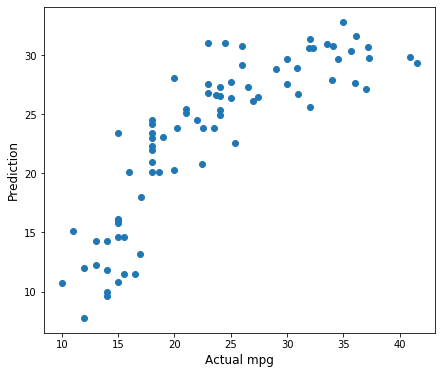

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual mpg', size = 12)
plt.show()

In [30]:
#6
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 3.501226212506566
Mean Squared Error: 19.19342598101182
Root Mean Squared Error: 4.38103024196499


In [37]:
 #7 normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df_clean)
df_normalized = pd.DataFrame(data_normalized, columns = df_clean.columns.to_list())

df_normalized.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810


In [38]:
#8
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
features = df_normalized[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
response = df_normalized[['mpg']]
my_linear_regression.fit(features, response)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#9 extract feature importance
importance = my_linear_regression.coef_[0]
feature_names = df_normalized.columns.to_list()
feature_names.remove('mpg')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

cylinders: -0.04890
displacement: -0.01240
horsepower: -0.19304
weight: -0.50411
acceleration: -0.00315


In [40]:
#acceleration is the least important of the features since closest to 0

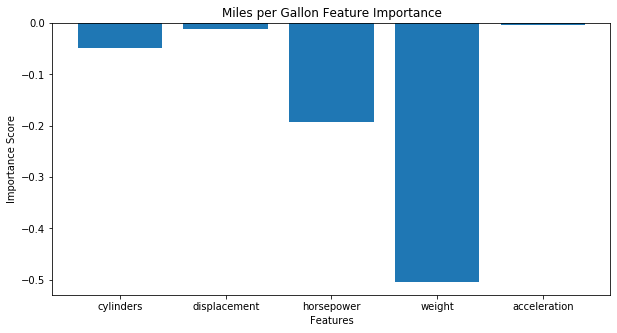

In [41]:
#10
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Miles per Gallon Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

In [42]:
#for bonus questions I'll be removing displacement and acceleration since they are the least importants
df_clean2 = df_clean.drop(columns = ['acceleration', 'displacement'])
df_clean2.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [43]:
response = df_clean2['mpg']
features = df_clean2[['cylinders', 'horsepower', 'weight']]


In [44]:
from sklearn.model_selection import train_test_split

my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [45]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

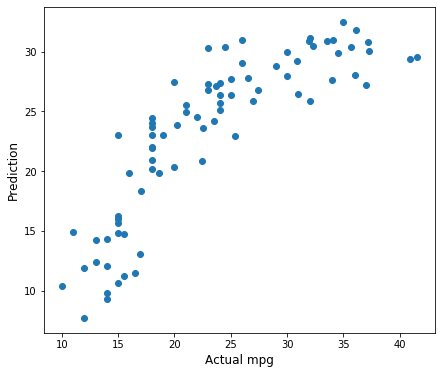

In [46]:
response_pred = my_linear_regression.predict(features_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual mpg', size = 12)
plt.show()

In [47]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 3.455263360488702
Mean Squared Error: 18.630293372030707
Root Mean Squared Error: 4.316282355457148


In [ ]:
#Errors have decreased, meaning the removal of the selected features was successful.